In [32]:
import numpy as np
import pandas as pd
import os
import time
import librosa
import matplotlib.pyplot as plt
# supervised learning
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [26]:
sounds = {"kick":"kick",
          "kik":"kick",
          "snare":"snare",
          "snr":"snare",
          "bongo":"bongo",
          "tom":"tom",
          "hat":"hihat",
          "hh":"hihat",
          "ride":"ride",
          "clap":"clap",
          "cow":"cowbell",
          "bell":"cowbell",
          "conga":"conga"
         }
kits,sound_profiles,files,lengths,mfccs = [],[],[],[],[]
data_path = "data/drums/"
start_time=time.time()
for kit_path in os.listdir(data_path):
    kit = os.listdir(data_path + "/" + kit_path)
    sound_list = [[x,[sounds[sound] for sound in sounds if sound in x.lower()]] for x in kit]
    sound_list = np.array([[x[0],x[1][0]] for x in sound_list if x[1]])
    #print(kit_path,"------------------",sound_list)
    if len(sound_list)>0:
        for sound_path,sound_profile in sound_list:
            # add files, kits, sound_profiles
            files.append(sound_path)
            kits.append(kit_path)
            sound_profiles.append(sound_profile)
            # load data
            data,Fs = librosa.load(data_path + kit_path + "/" + sound_path,sr=None)
            # find longest file: 131811 S
            lengths.append(len(data))
            # zero pad or cut to 2 seconds
            if len(data) > Fs*2: 
                data = data[:Fs*2]
            elif len(data) < Fs*2: 
                data = np.append(data,[0]*(Fs*2-len(data)))
            # process wav
            mfcc_temp = librosa.feature.mfcc(np.array(data),sr=Fs,n_mfcc=40, n_fft=2048, hop_length=512)
            mfcc_slice = mfcc_temp[1:13,:]
            mfccs.append(mfcc_slice.ravel())
print("Processed",len(lengths),"files in {:0.2f}".format(time.time()-start_time),"seconds")

Processed 2642 files in 67.38 seconds


In [28]:
df = pd.DataFrame(mfccs)
X = df.values
df['file']=files
df['kit']=kits
df['sound_profile']=sound_profiles
Y = pd.factorize(sound_profiles)

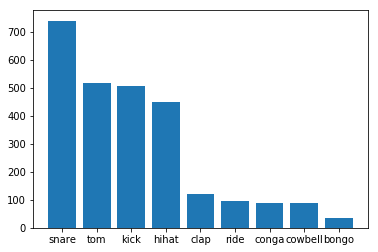

In [44]:
# target distribution
sound_count = df['sound_profile'].value_counts()
plt.bar(range(len(sound_count)),sound_count,tick_label=sound_count.index)
plt.show()

In [43]:
svc = SVC(C=100,kernel='linear')
lg = LogisticRegression(C=1,penalty='l2')
def evaluate(model):
    score = cross_val_score(model,X,Y[0])
    print("SVC Accuracy {:0.4f} +/- {:0.4f} in {:0.2f} seconds".format(score.mean(),score.std(),time.time()-start_time))
evaluate(svc)
#evaluate(lg)

SVC Accuracy 0.6998 +/- 0.0241 in 525.14 seconds


In [ ]:
# Neural Networks
